In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regresion

In [2]:
from sklearn import linear_model

In [3]:
df1 = pd.read_csv("canada.csv")
df1.columns = ["year","price"]
df1.head()

,year,price
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


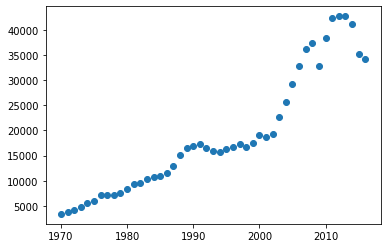

In [4]:
plt.scatter(df1[["year"]],df1.price)

In [5]:
reg1 = linear_model.LinearRegression()
reg1.fit(df1[['year']], df1.price)

LinearRegression()

In [6]:
reg1.predict([[2020]])

array([41288.69409442])

## Multivariate Regression

In [7]:
from word2number import w2n
from sklearn import linear_model
import math

In [8]:
df2 = pd.read_csv("hiring.csv")
df2.head(10)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [9]:
test_score_median = math.floor(df2.test_score.mean())
test_score_median

7

In [10]:
df2.test_score = df2.test_score.fillna(test_score_median)
df2.head(10)

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [11]:
df2.experience = df2.experience.fillna('zero')
df2.head(10)

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [12]:
exp_num = []
for i in df2.experience:
    exp_num.append(w2n.word_to_num(i))
print(exp_num)
df2['experience'] = exp_num
df2.head(10)

[0, 0, 5, 2, 7, 3, 10, 11]


,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['experience','test_score','interview_score']], df2.salary)

LinearRegression()

In [14]:
reg2.predict([[2,9,6]])

array([53713.86677124])

In [15]:
reg2.predict([[12,10,10]])

array([93747.79628651])

## Gradient Descent MSE

In [16]:
df3 = pd.read_csv('score.csv')
math = np.array(list(df3['math']))
cs = np.array(list(df3['cs']))
y_pred = 2*math + 3
print(sum(((cs - y_pred)**2)/len(math)))

4742.700000000001


In [17]:
def grad_des(x,y,alpha,iterations):
    m = 0
    b = 0
    for i in range(iterations):
        y_pred = m*x + b
        add = 0
        for j in (y-y_pred):
            add += j**2
        cost = add/len(x)
        md = -(2/len(x))*sum(x*(y-y_pred))
        bd = -(2/len(x))*sum(y-y_pred)
        m = m - md*alpha
        b = b - bd*alpha
    return cost

In [18]:
grad_des(math,cs,0.000211,200000)

31.60452418996281

## Joblib and Pickle

In [19]:
import pickle
import joblib

In [20]:
with open('reg_pickle','wb') as f:
    pickle.dump(reg1,f)

In [21]:
with open('reg_pickle','rb') as f:
    mp = pickle.load(f)

In [22]:
mp.predict([[3287]])

array([1090953.94440159])

In [23]:
joblib.dump(reg2,'model_joblib')

['model_joblib']

In [24]:
mj = joblib.load('model_joblib')

In [25]:
mj.predict([[5,7,9]])

array([64480.50331623])

## One Hot Encoding

In [26]:
from sklearn import linear_model

In [27]:
df4 = pd.read_csv('car.csv')
dfsk = df4

In [28]:
df4 = pd.get_dummies(df4)
df4 = df4.drop(['Car_Mercedez Benz C class'],axis = 1)
X = df4.drop(['Price'],axis = 1)

In [29]:
X

,Mileage,Age,Car_Audi A5,Car_BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [30]:
reg3 = linear_model.LinearRegression()
reg3.fit(X,df4.Price)

LinearRegression()

In [31]:
reg3.predict([[45000,4,0,0]])

array([36991.31721061])

In [32]:
reg3.predict([[86000,7,0,1]])

array([11080.74313219])

In [33]:
reg3.score(X,df4.Price)

0.9417050937281082

## Train and Test Data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [35]:
df5 = pd.read_csv('car.csv')
df5 = df5.drop(['Car'],axis = 1)
df5

,Mileage,Price,Age
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


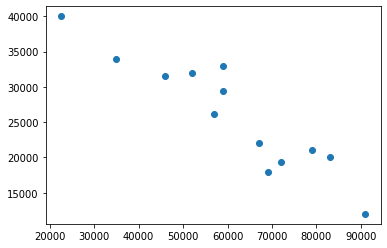

In [36]:
plt.scatter(df5['Mileage'],df5['Price'])

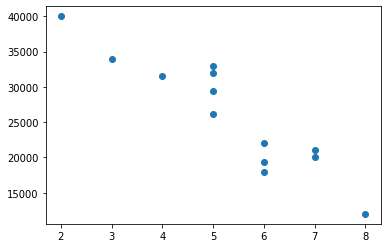

In [37]:
plt.scatter(df5['Age'],df5['Price'])

In [38]:
X = df5[['Mileage','Age']]
Y = df5['Price']

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.15)

In [40]:
print(len(X_train),len(X_test),len(Y_train),len(Y_test))

11 2 11 2


In [41]:
reg4 = linear_model.LinearRegression()
reg4.fit(X_train,Y_train)
X_test

,Mileage,Age
8,91000,8
11,79000,7


In [42]:
reg4.predict(X_test)
Y_test

8     12000
11    21000
Name: Price, dtype: int64

In [43]:
reg4.score(X_train,Y_train)

0.8094600278567032

## Logistic Regression Binary Classification

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [45]:
df6 = pd.read_csv('HR_comma_sep.csv')
df6

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [46]:
df6[df6['left']==1].mean()

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64

In [47]:
df6[df6['left']==0].mean()

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64

In [48]:
df6 = df6.drop(['last_evaluation','number_project','average_montly_hours','time_spend_company'],axis = 1)
df6

,satisfaction_level,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0,1,0,sales,low
1,0.80,0,1,0,sales,medium
2,0.11,0,1,0,sales,medium
3,0.72,0,1,0,sales,low
4,0.37,0,1,0,sales,low
...,...,...,...,...,...,...
14994,0.40,0,1,0,support,low
14995,0.37,0,1,0,support,low
14996,0.37,0,1,0,support,low
14997,0.11,0,1,0,support,low


<AxesSubplot:xlabel='Department'>

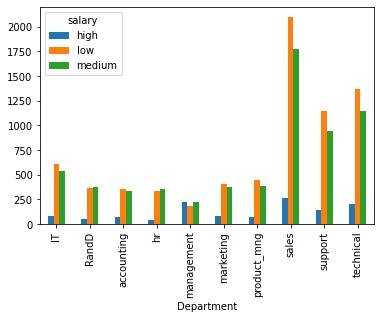

In [49]:
pd.crosstab(df6['Department'],df6['salary']).plot(kind = 'bar')

<AxesSubplot:xlabel='salary'>

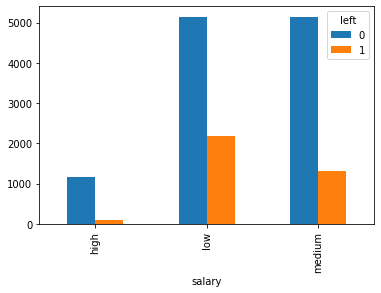

In [50]:
pd.crosstab(df6['salary'],df6['left']).plot(kind = 'bar')

In [51]:
df6 = df6.drop(['Department'],axis =1 )
df6.head()

,satisfaction_level,Work_accident,left,promotion_last_5years,salary
0,0.38,0,1,0,low
1,0.80,0,1,0,medium
2,0.11,0,1,0,medium
3,0.72,0,1,0,low
4,0.37,0,1,0,low


In [52]:
df6 = pd.get_dummies(df6)
df6.head()

,satisfaction_level,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,0,1,0,0,1,0
1,0.80,0,1,0,0,0,1
2,0.11,0,1,0,0,0,1
3,0.72,0,1,0,0,1,0
4,0.37,0,1,0,0,1,0


In [53]:
df6 = df6.drop(['salary_low'],axis = 1)
df6.head()

,satisfaction_level,Work_accident,left,promotion_last_5years,salary_high,salary_medium
0,0.38,0,1,0,0,0
1,0.80,0,1,0,0,1
2,0.11,0,1,0,0,1
3,0.72,0,1,0,0,0
4,0.37,0,1,0,0,0


In [54]:
X = df6.drop('left',axis = 1)
Y= df6['left']

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.01)

In [56]:
cls1 = linear_model.LogisticRegression()
cls1.fit(X_train,Y_train)

LogisticRegression()

In [57]:
cls1.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
cls1.score(X_test,Y_test)

0.74

## Logistic Regression Multi Class Classification

In [59]:
from sklearn.datasets import load_iris
from sklearn import linear_model
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [60]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size = 0.2)

In [62]:
cls2 = linear_model.LogisticRegression(max_iter = 10000)
cls2.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [63]:
cls2.predict(X_test)

array([1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 2, 1, 2])

In [64]:
cls2.score(X_test,Y_test)

1.0

Text(15.0, 0.5, 'Truth')

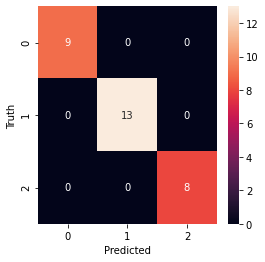

In [65]:
Y_predicted = cls2.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
plt.figure(figsize = (4,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Decision Tree Classifier

In [66]:
from sklearn import tree
import math

In [67]:
df7 = pd.read_csv('titanic.csv')
df7.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df7 = df7.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1)
df7.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [69]:
age_median = np.floor(df7.Age.mean())
age_median

29.0

In [70]:
df7['Age'] = df7['Age'].fillna(age_median)
df7

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,29.0,23.4500
889,1,1,male,26.0,30.0000


In [71]:
df7 = pd.get_dummies(df7)
df7.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [72]:
df7 = df7.drop(['Sex_male'],axis = 1)
df7.head()

,Survived,Pclass,Age,Fare,Sex_female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [73]:
dfs = df7[df7['Survived']==1]
dfs.shape

(342, 5)

In [74]:
dfns = df7[df7['Survived']==0]
dfns.shape

(549, 5)

In [75]:
df7[df7['Survived']==0].mean()

Survived       0.000000
Pclass         2.531876
Age           30.255920
Fare          22.117887
Sex_female     0.147541
dtype: float64

In [76]:
df7[df7['Survived']==1].mean()

Survived       1.000000
Pclass         1.950292
Age           28.443480
Fare          48.395408
Sex_female     0.681287
dtype: float64

In [77]:
X = df7.drop(['Survived'],axis = 1)
Y = df7['Survived']

In [78]:
cls3 = tree.DecisionTreeClassifier()

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1)

In [80]:
cls3.fit(X_train,Y_train)

DecisionTreeClassifier()

In [81]:
cls3.score(X_test,Y_test)

0.7666666666666667

In [82]:
cls3.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [83]:
cls3.predict([[3,22.0,7.2500,0]])

array([0], dtype=int64)

## SVM

In [84]:
from sklearn.datasets import load_digits
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [85]:
digit = load_digits()

In [86]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [87]:
X_train,X_test,Y_train,Y_test = train_test_split(digit.data,digit.target,test_size = 0.1)

In [88]:
cls4 = SVC()
cls4.fit(X_train,Y_train)

SVC()

In [89]:
cls4.score(X_test,Y_test)

1.0

In [90]:
cls4.predict(X_test)

array([7, 5, 8, 4, 3, 3, 6, 6, 1, 8, 9, 5, 6, 3, 8, 4, 0, 7, 4, 4, 7, 1,
       1, 4, 3, 9, 4, 2, 2, 0, 8, 8, 3, 3, 9, 9, 8, 7, 2, 7, 0, 7, 9, 0,
       1, 4, 4, 0, 7, 2, 2, 5, 6, 0, 4, 4, 1, 0, 2, 7, 3, 1, 7, 4, 6, 5,
       5, 5, 1, 3, 6, 3, 4, 4, 9, 7, 8, 4, 9, 5, 1, 3, 3, 3, 9, 4, 4, 0,
       6, 9, 6, 4, 0, 5, 0, 2, 4, 8, 0, 0, 4, 4, 2, 6, 4, 5, 4, 9, 1, 3,
       0, 9, 6, 1, 0, 9, 5, 3, 5, 9, 5, 0, 2, 8, 1, 6, 6, 9, 2, 9, 4, 8,
       0, 1, 6, 2, 7, 9, 7, 5, 7, 1, 8, 7, 6, 7, 8, 7, 8, 4, 7, 9, 5, 3,
       4, 3, 7, 9, 9, 3, 3, 8, 4, 7, 9, 0, 2, 7, 6, 0, 1, 6, 5, 0, 0, 6,
       8, 1, 7, 1])

Text(69.0, 0.5, 'Truth')

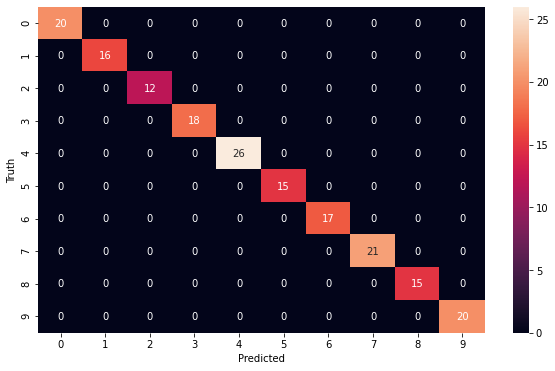

In [91]:
Y_predicted = cls4.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
plt.figure(figsize = (10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Random Forest Classifier

In [92]:
from sklearn.datasets import load_iris
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [93]:
iris = load_iris()

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size = 0.2)

In [95]:
cls5 = RandomForestClassifier(n_estimators = 60)
cls5.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=60)

In [96]:
cls5.score(X_test,Y_test)

0.9

Text(69.0, 0.5, 'Truth')

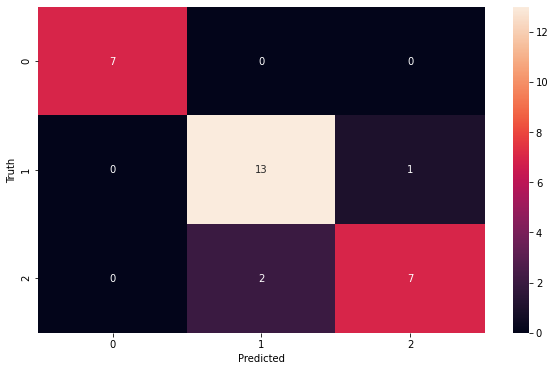

In [97]:
Y_predicted = cls5.predict(X_test)
cm = confusion_matrix(Y_test,Y_predicted)
plt.figure(figsize = (10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## KFolds Technique

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sn

In [99]:
iris = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris.data,iris.target,test_size=0.1)
folds = StratifiedKFold(n_splits = 10)

In [100]:
cross_val_score(LogisticRegression(max_iter=1000),iris.data,iris.target).mean()

0.9733333333333334

In [101]:
cross_val_score(SVC(),iris.data,iris.target).mean()

0.9666666666666666

In [102]:
cross_val_score(RandomForestClassifier(n_estimators=40),iris.data,iris.target).mean()

0.9666666666666668

In [103]:
cross_val_score(DecisionTreeClassifier(),iris.data,iris.target).mean()

0.9666666666666668

In [104]:
cls6 = LogisticRegression(max_iter = 1000)
cls6.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [105]:
cls6.predict(X_test)

array([2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 1])

In [106]:
cls6.score(X_test,Y_test)

1.0

Text(69.0, 0.5, 'Truth')

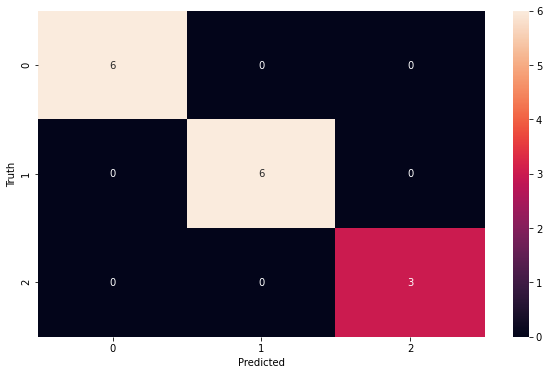

In [107]:
Y_predicted = cls5.predict(X_test)
cm = confusion_matrix(Y_test,Y_predicted)
plt.figure(figsize = (10,6))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## K-Mean Clustering

In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
import seaborn as sns

In [109]:
iris = load_iris()
cls7 = KMeans(n_clusters = 3,random_state = True)
data = pd.DataFrame(iris['data'], columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
data['species'] = iris['target']

In [110]:
scaler = MinMaxScaler()
scaler.fit(data[['petal_length']])
data['petal_length'] = scaler.transform(data[['petal_length']])

scaler.fit(data[['petal_width']])
data['petal_width'] = scaler.transform(data[['petal_width']])

scaler.fit(data[['sepal_length']])
data['sepal_length'] = scaler.transform(data[['sepal_length']])

scaler.fit(data[['sepal_width']])
data['sepal_width'] = scaler.transform(data[['sepal_width']])

data

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


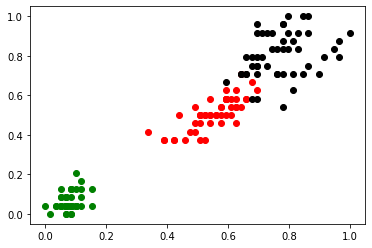

In [111]:
a = data[data.species==0]
b = data[data.species==1]
c = data[data.species==2]
plt.scatter(a.petal_length,a.petal_width,color='green')
plt.scatter(b.petal_length,b.petal_width,color='red')
plt.scatter(c.petal_length,c.petal_width,color='black')

<AxesSubplot:>

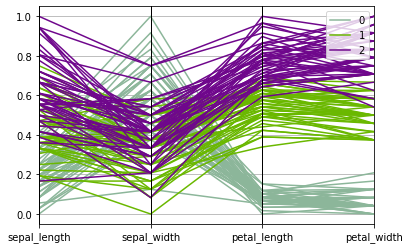

In [112]:
data_graph = sns.load_dataset('iris')
parallel_coordinates(data,'species')

In [113]:
cls7.fit_predict(data.drop(['species'],axis = 1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [114]:
y_predicted = cls7.fit_predict(data.drop(['species'],axis = 1))
print(cls7.cluster_centers_)
data['cluster'] = y_predicted

[[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.19611111 0.595      0.07830508 0.06083333]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


<AxesSubplot:>

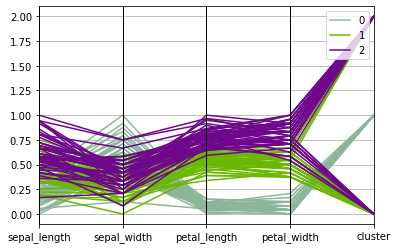

In [115]:
parallel_coordinates(data,'species')

In [116]:
sse = []
k_rng = range(1,15)
for k in k_rng:
    cls7 = KMeans(n_clusters=k)
    cls7.fit(data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
    sse.append(cls7.inertia_)

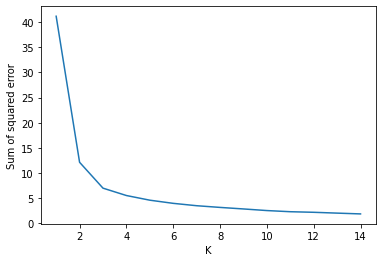

In [117]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [118]:
cls8 = KMeans(n_clusters=3)
cls8.fit_predict(data.drop(['species','sepal_length','sepal_width'],axis = 1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [119]:
y_predicted = cls8.fit_predict(data.drop(['species','sepal_length','sepal_width'],axis = 1))
print(cls8.cluster_centers_)
data['cluster'] = y_predicted

[[5.75715477e-01 5.49180328e-01 9.99200722e-16]
 [7.97044763e-01 8.24786325e-01 2.00000000e+00]
 [7.83050847e-02 6.08333333e-02 1.00000000e+00]]


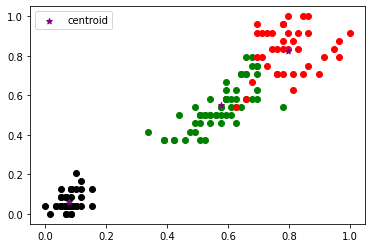

In [120]:
a = data[data.cluster==0]
b = data[data.cluster==1]
c = data[data.cluster==2]
plt.scatter(a.petal_length,a.petal_width,color='green')
plt.scatter(b.petal_length,b.petal_width,color='red')
plt.scatter(c.petal_length,c.petal_width,color='black')
plt.scatter(cls8.cluster_centers_[:,0],cls8.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Naive Bayes

In [121]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import math

In [122]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [123]:
data = pd.DataFrame(wine.data,columns = ['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline'])
data['type'] = wine.target

In [124]:
x = data[data['type']==0].mean()
x

alcohol                           13.744746
malic_acid                         2.010678
ash                                2.455593
alcalinity_of_ash                 17.037288
magnesium                        106.338983
total_phenols                      2.840169
flavanoids                         2.982373
nonflavanoid_phenols               0.290000
proanthocyanins                    1.899322
color_intensity                    5.528305
hue                                1.062034
od280/od315_of_diluted_wines       3.157797
proline                         1115.711864
type                               0.000000
dtype: float64

In [125]:
y = data[data['type']==1].mean()
y

alcohol                          12.278732
malic_acid                        1.932676
ash                               2.244789
alcalinity_of_ash                20.238028
magnesium                        94.549296
total_phenols                     2.258873
flavanoids                        2.080845
nonflavanoid_phenols              0.363662
proanthocyanins                   1.630282
color_intensity                   3.086620
hue                               1.056282
od280/od315_of_diluted_wines      2.785352
proline                         519.507042
type                              1.000000
dtype: float64

In [126]:
z = data[data['type']==2].mean()
z

alcohol                          13.153750
malic_acid                        3.333750
ash                               2.437083
alcalinity_of_ash                21.416667
magnesium                        99.312500
total_phenols                     1.678750
flavanoids                        0.781458
nonflavanoid_phenols              0.447500
proanthocyanins                   1.153542
color_intensity                   7.396250
hue                               0.682708
od280/od315_of_diluted_wines      1.683542
proline                         629.895833
type                              2.000000
dtype: float64

In [127]:
X_train,X_test,Y_train,Y_test = train_test_split(wine.data,wine.target,test_size = 0.3)

In [128]:
cls9 = GaussianNB()
cls9.fit(X_train,Y_train)

GaussianNB()

In [129]:
cls9.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 0, 0, 1, 2, 1, 2, 1, 0])

In [130]:
cls9.score(X_test,Y_test)

0.9814814814814815

In [131]:
cls10 = MultinomialNB()
cls10.fit(X_train,Y_train)

MultinomialNB()

In [132]:
cls10.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 2, 0])

In [133]:
cls10.score(X_test,Y_test)

0.7962962962962963

In [134]:
Y_test[::1]

array([1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 1, 0, 2,
       2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       2, 2, 0, 0, 1, 2, 1, 2, 1, 0])

## Hyper Parameter Tuning

In [135]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [136]:
digits = load_digits()

In [137]:
HPT = {
    'svc' : {
        'model' : SVC(gamma = 'auto'),
        'params' :{
            'C' : [1,10,20], 
            'kernel' : ['linear', 'rbf']
         }
    },
    'randomforest' : {
        'model' : RandomForestClassifier(),
        'params' :{
            'n_estimators' : [10,70,100],
            'criterion' : ['gini', 'entropy']
        }
    },
    'LogiReg' : {
        'model' : LogisticRegression(max_iter = 5000),
        'params' : {
            'multi_class' : ['auto', 'multinomial'],
            'C' : [1,10,20]
        }
    },
    'Gauss' : {
        'model' : GaussianNB(),
        'params' : {
            'var_smoothing' : [1e-08,1e-09]
        }
    },
    'Multi' : {
        'model' : MultinomialNB(),
        'params' : {
            'alpha' : [1,5,10]
        }
    },
    'Decision' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
            'splitter' :  ['best','random']
        }
    }
}

In [138]:
scores = []

In [139]:
for model_names, modelp in HPT.items():
    clf = GridSearchCV(modelp['model'],modelp['params'],cv=5,return_train_score =False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model' : model_names,
        'best_param' : clf.best_params_,
        'best_score' : clf.best_score_
    })

In [140]:
df8 = pd.DataFrame(scores, columns = ['model','best_param','best_score'])
df8

,model,best_param,best_score
0,svc,"{'C': 1, 'kernel': 'linear'}",0.947697
1,randomforest,"{'criterion': 'gini', 'n_estimators': 70}",0.942139
2,LogiReg,"{'C': 1, 'multi_class': 'auto'}",0.913760
3,Gauss,{'var_smoothing': 1e-08},0.819723
4,Multi,{'alpha': 10},0.874246
5,Decision,"{'criterion': 'entropy', 'splitter': 'best'}",0.817487
